In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import math

import matplotlib.pyplot as plt
import seaborn as sns

#import
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
#import r2
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Exploration

In [2]:
#import csv for exploration
df = pd.read_excel('ATT_dataframe_adjusted.xlsx')
df

,adjusted_revenue_A,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,home_ownership_rate,government_spending,...,brent_oil,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
0,30.466827,2022,4,334.110000,81628.790537,4.10,3.5,9.94494,65.9,6403.986018,...,83.785733,893.875,283,96.831203,99.187750,24111.337914,5802.886035,3415.686364,7,5
1,32.217698,2022,3,333.640000,80793.111557,2.56,3.5,11.71485,66.0,6233.072139,...,93.142273,905.137,535,96.364630,99.728723,23908.986867,5756.706166,3400.958279,7,5
2,30.880146,2022,2,333.130000,80193.425249,2.40,3.6,12.53299,65.8,6111.421484,...,121.187233,910.009,90,96.548767,100.379633,23747.293853,5720.319938,3392.036692,7,5
3,30.520064,2022,1,332.740000,80164.549888,2.39,3.6,12.11522,65.4,6252.364765,...,119.325143,872.642,233,97.379660,101.000767,24266.758737,5848.096021,3480.869634,7,5
4,31.529260,2021,4,332.590000,77462.986119,2.27,3.9,11.09446,65.5,6653.420897,...,81.724699,832.077,179,98.018177,101.525000,24758.739234,5966.435922,3505.226386,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,16.405439,2004,1,292.144396,103784.275374,1.00,5.8,7.54008,68.6,3876.610103,...,54.418726,429.896,131,101.281200,102.121033,22660.123063,4190.771430,3611.162017,2,9
76,16.297444,2003,4,291.468297,105897.489978,0.98,5.7,7.73520,68.6,3880.794442,...,49.240385,416.504,111,100.826700,101.512533,22236.701508,3999.692588,3410.333912,2,2
77,16.091478,2003,3,290.792198,105382.869347,1.01,6.1,8.47832,68.4,3805.002477,...,44.553972,405.039,523,100.429600,100.183160,22128.639784,3980.255637,3393.761015,2,2
78,16.721687,2003,2,290.116099,106243.371818,1.22,6.3,8.24878,68.0,3819.956375,...,45.785727,395.267,443,100.249137,99.058023,22309.330909,4012.756364,3421.472727,2,2


In [4]:
def split_data(df):
    '''
    Take in a DataFrame and perform a train-test split with a 70/30 ratio.
    Return train and test DataFrames.
    '''
    train, test = train_test_split(df, test_size=0.25, random_state=123)
    return train, test

In [5]:
#split data into train, validate, test
train, test = split_data(df)
train.head()

,adjusted_revenue_A,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,home_ownership_rate,government_spending,...,brent_oil,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
1,32.217698,2022,3,333.640000,80793.111557,2.56,3.5,11.71485,66.0,6233.072139,...,93.142273,905.137,535,96.364630,99.728723,23908.986867,5756.706166,3400.958279,7,5
24,49.270271,2016,4,323.910000,84237.593248,0.12,4.7,6.75080,63.7,5280.566169,...,69.534814,554.247,376,100.890333,100.016860,23867.128525,5828.401819,3681.295425,7,7
65,24.024688,2006,3,298.905385,96990.568396,5.25,4.5,6.51207,69.0,4173.951270,...,94.024613,548.461,153,99.864470,99.864010,24610.221262,4159.346939,3574.391784,3,8
45,43.940066,2011,3,311.890000,81260.557594,0.08,9.0,12.81262,66.3,5088.309714,...,150.561886,417.707,1095,96.981693,99.904830,22595.835528,4455.157002,3458.697196,5,10
60,43.924219,2007,4,302.285879,94080.174105,4.24,5.0,9.10881,67.8,4345.990342,...,132.945925,526.113,421,99.074943,99.215990,24578.854482,4144.413229,3919.252328,3,5


In [6]:
def plot_that_target(train):
    """
    Visualize the target variable.

    Parameters:
    -----------
    train: pandas DataFrame
        
    Returns:
    --------
    countplot of revenue in the train data set
    """
    sns.histplot(data=train, x='adjusted_revenue_A')
    plt.title('ATT revenue in Billions')
    plt.xlabel('Revenue in Billions')
    plt.ylabel('Quarters')
    plt.show

    return

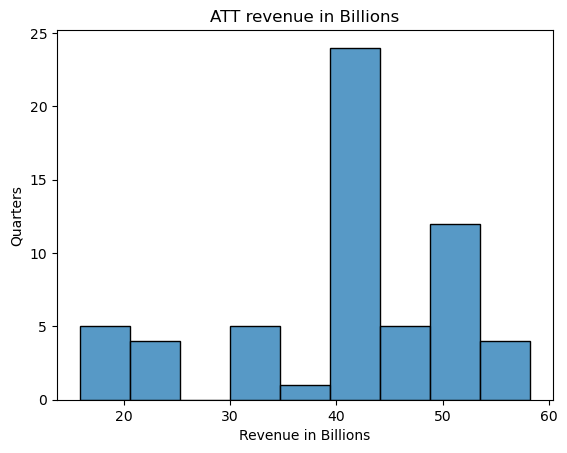

In [7]:
#use function to see
plot_that_target(train)

# Check for normalcy
$H_{0}$ The target is normally distributed.
    
$H_{a}$ The target is not normally distributed.

In [8]:
#check target for normalcy
statistic, p_value = stats.shapiro(train.adjusted_revenue_A)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.8844767212867737
p-value: 3.743886190932244e-05


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the target total revenue is not normally distributed.
- using this information, we will not assume normality
    - the requirement for pearson's correlation test is that both variables be normally distributed
    - since our target is non-parametric, we will us the spearman's rank correlation test as our statistical test for all continuous to continuous variable testing.

# View Pairwise relationships

In [ ]:
def plot_variable_pairs(train):
    sns.set(style="ticks")
    sns.pairplot(train, kind="reg", corner = True, hue='adjusted_revenue_S', plot_kws={'line_kws': {'color': 'red'}})
    plt.show()

In [ ]:
# use functions to see pairwise relationships
plot_variable_pairs(train)

# Uni-variate analysis

In [9]:
def univariate_visual(df):
    '''
    creates histplots for all of my columns
    '''
    num_cols = df.shape[1]
    num_rows = math.ceil(num_cols / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(14, 4*num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(rotation=45)

    plt.tight_layout()
    plt.show()

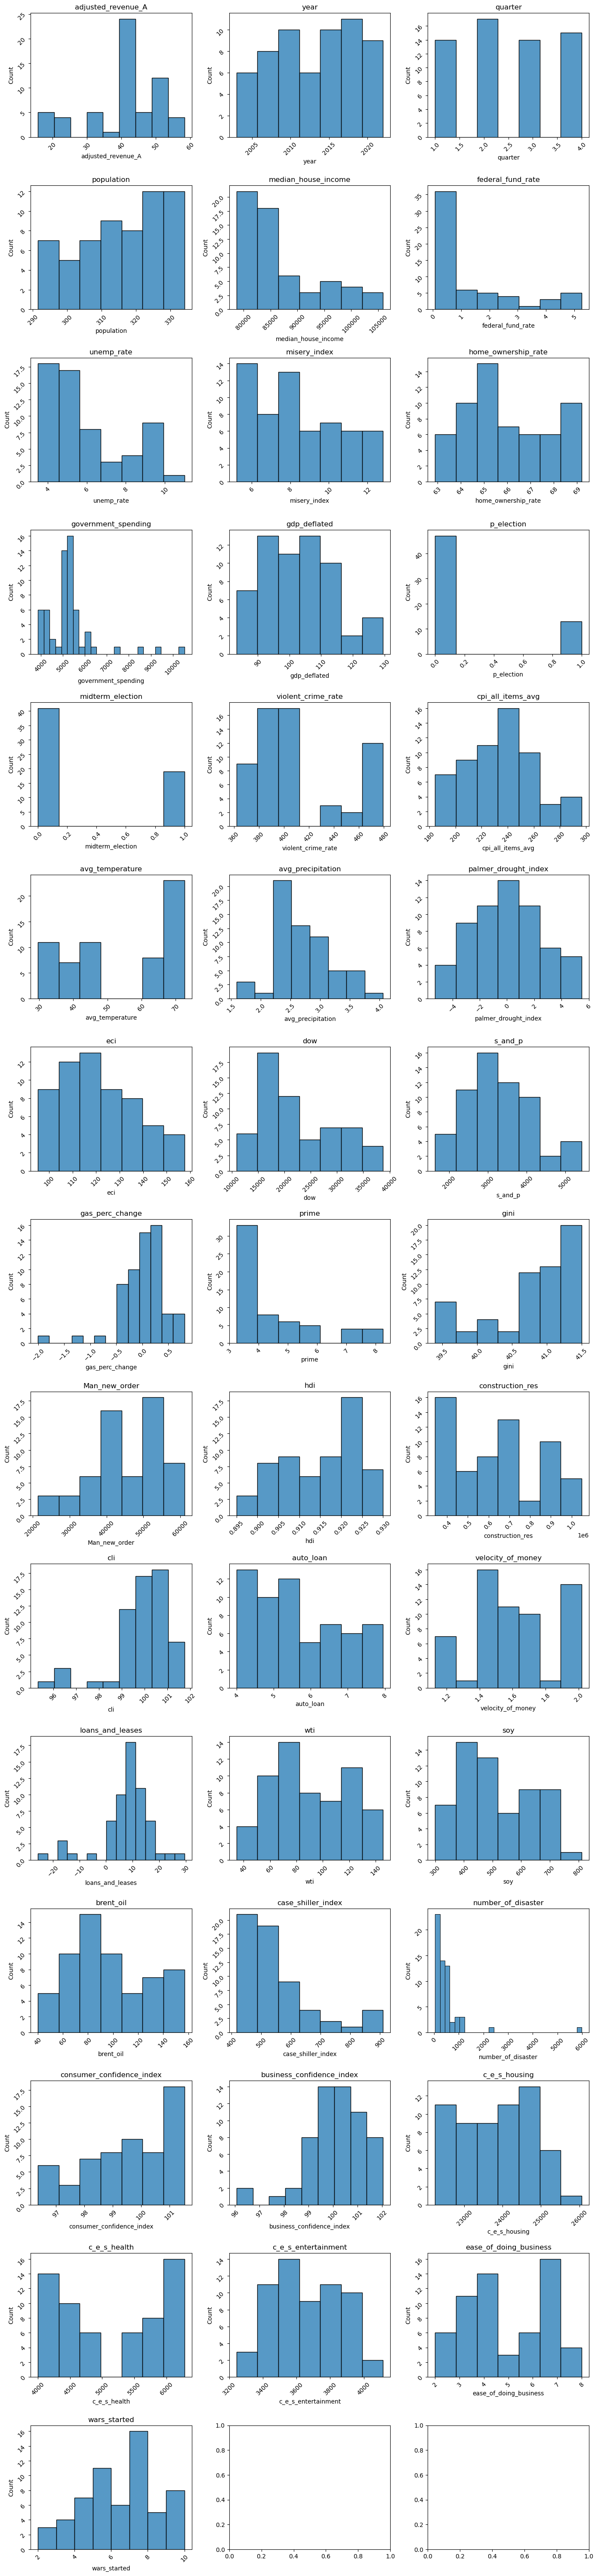

In [10]:
#run function to perform visual univariate analysis
univariate_visual(train)

# Bi-variate analysis

# Brent oil price per barrel

Does brent oil price per barrel impact revenue at ATT?

$H_{0}$ Brent oil price per barrel does not influence revenue.

$H_{a}$ Brent oil price per barrel does influence revenue.

### Visualize

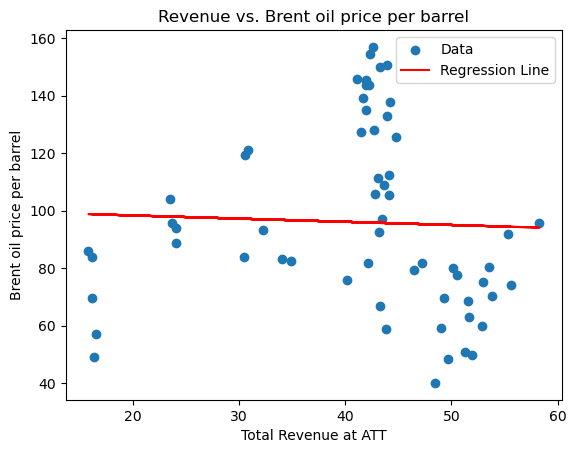

In [11]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['brent_oil'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['brent_oil'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Brent oil price per barrel')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Brent oil price per barrel')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [12]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.brent_oil)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.30430675187552103
p-value: 0.018082340964022583


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that ATT revenue is not influenced by brent oil price per barrel.
- ***this feature will not be moved into modeling***

# Employment Cost Index

Does the Employment Cost Index impact revenue at ATT?

$H_{0}$ Employment Cost Index does not influence revenue.

$H_{a}$ Employment Cost Index does influence revenue.

### Visualize

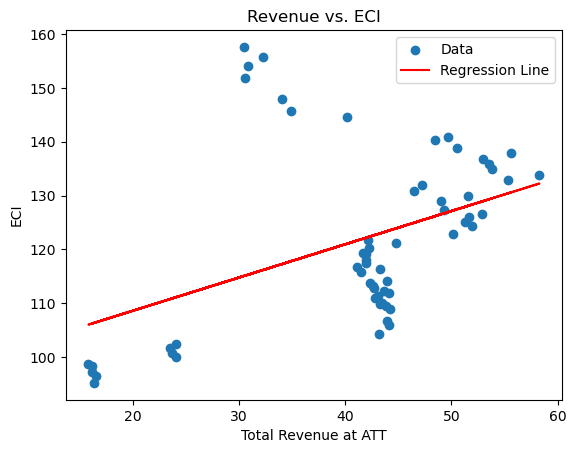

In [13]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['eci'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['eci'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. ECI')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('ECI')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [14]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.eci)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.418838566268408
p-value: 0.0008665264104897633


- based on the p-value of the spearmans rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by ECI.
- ***this feature will be moved into modeling***

# Gross domestic product implicit price deflator

Does the Gross domestic product implicit price deflator impact revenue at ATT?

$H_{0}$ Gross domestic product implicit price deflator does not influence revenue.

$H_{a}$ Gross domestic product implicit price deflator does influence revenue.

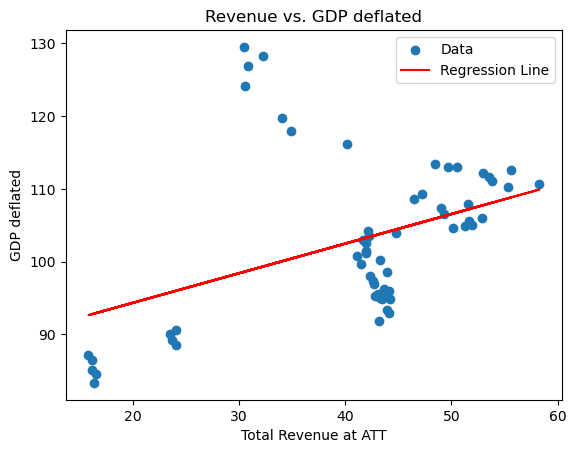

In [15]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['gdp_deflated'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['gdp_deflated'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. GDP deflated')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('GDP deflated')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [16]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.gdp_deflated)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.4190608502361768
p-value: 0.000860476467033464


- based on the p-value of the spearmans test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by the Gross domestic product implicit price deflator.
- ***this feature will be used in modeling***.

# Consumer Price Index

Does the Consumer Price Index impact revenue at ATT?

$H_{0}$ Consumer Price Index does not influence revenue.

$H_{a}$ Consumer Price Index does influence revenue.

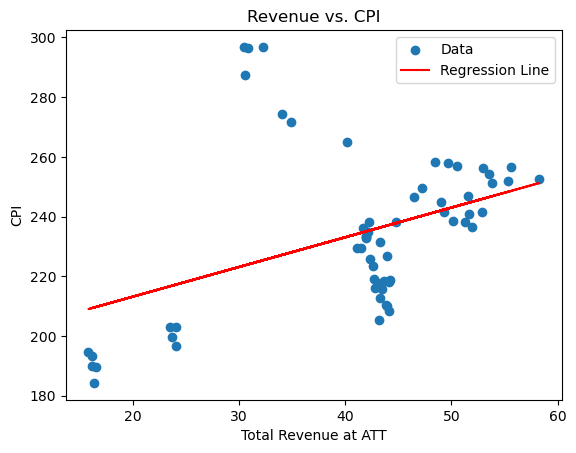

In [17]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['cpi_all_items_avg'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['cpi_all_items_avg'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. CPI')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('CPI')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [18]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.cpi_all_items_avg)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.4187332416803334
p-value: 0.0008694064351341736


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by Consumer Price Index.
- ***this feature will be used in modeling.***

# Government spending

Does Government spending impact revenue at ATT?

$H_{0}$ Government spending does not influence revenue.

$H_{a}$ Government spending does influence revenue.

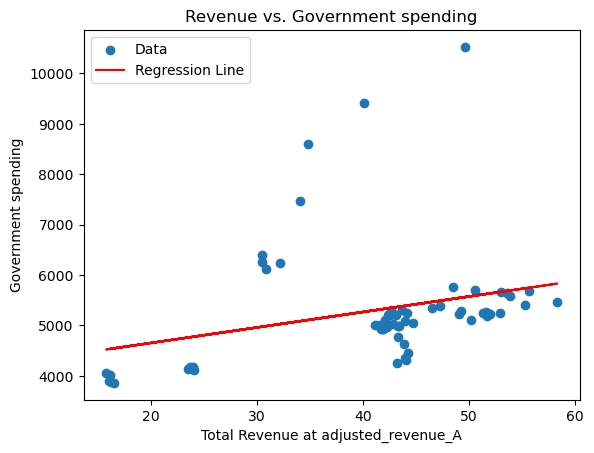

In [19]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['government_spending'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['government_spending'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Government spending')
plt.xlabel('Total Revenue at adjusted_revenue_A')
plt.ylabel('Government spending')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [20]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.government_spending)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.4404556821339261
p-value: 0.00042850580383983614


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by Government spending.
- ***this feature will be used in modeling.***

# Median household income

Does Median household income impact revenue at ATT?

$H_{0}$ Median household income does not influence revenue.

$H_{a}$ Median household income does influence revenue.



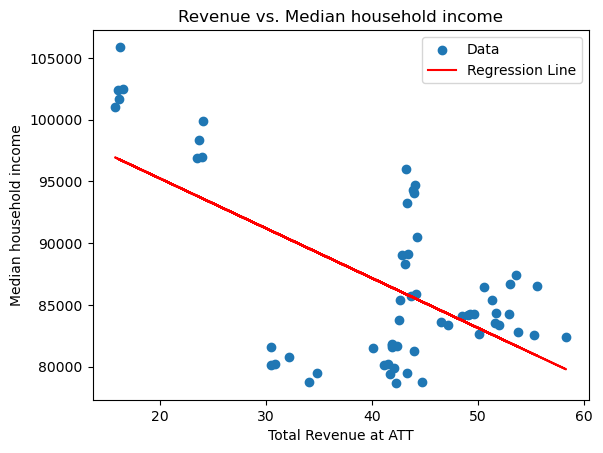

In [21]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['median_house_income'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['median_house_income'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Median household income')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Median household income')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [22]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.median_house_income)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.0898582939705474
p-value: 0.4947454454837571


- based on the p-value of the spearmans correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that ATT revenue is not influenced by Median household income.
- ***this feature will not be used in modeling***

# Federal fund rate

Does the Federal fund rate impact revenue at ATT?

$H_{0}$ Federal fund rate does not influence revenue.

$H_{a}$ Federal fund rate does influence revenue.

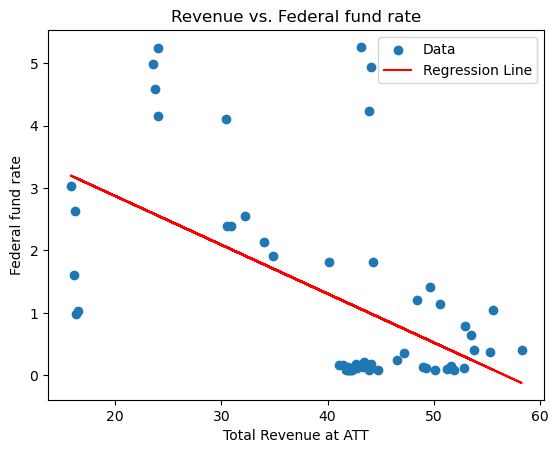

In [23]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['federal_fund_rate'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['federal_fund_rate'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Federal fund rate')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Federal fund rate')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [24]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.federal_fund_rate)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.3580638383315928
p-value: 0.004969652240727421


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by Federal fund rate.
- ***this feature will be used in modeling.***

# Dow Jones Industrial Average

Does the Dow impact revenue at ATT?

$H_{0}$ The Dow does not influence revenue.

$H_{a}$ The Dow does influence revenue.

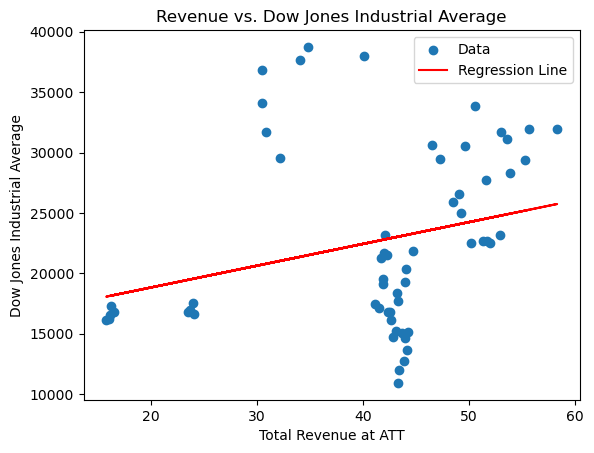

In [25]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['dow'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['dow'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Dow Jones Industrial Average')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Dow Jones Industrial Average')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [26]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.dow)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.3025840511253126
p-value: 0.01877953085932057


- based on the p-value of the spearmans correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by the Dow.
- ***this feature will be used in modeling***

# S&P 500 Average

Does the S&P 500 Average impact revenue at ATT?

$H_{0}$ S&P 500 Average does not influence revenue.

$H_{a}$ S&P 500 Average does influence revenue.

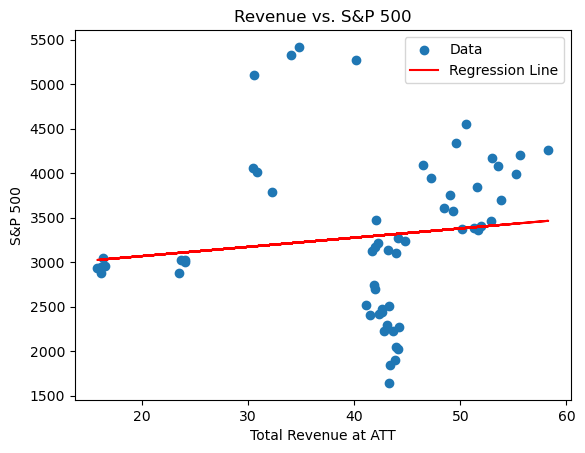

In [27]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['s_and_p'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['s_and_p'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. S&P 500')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('S&P 500')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [29]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.s_and_p)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.28380105584884696
p-value: 0.02798698879620075


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by the S&P 500.
- ***we will push this feature into our model***

# Gas price change percentage

Does percentage gas price change impact revenue at ATT?

$H_{0}$ Percentage gas price change does not influence revenue.

$H_{a}$ Percentage gas price change does influence revenue.

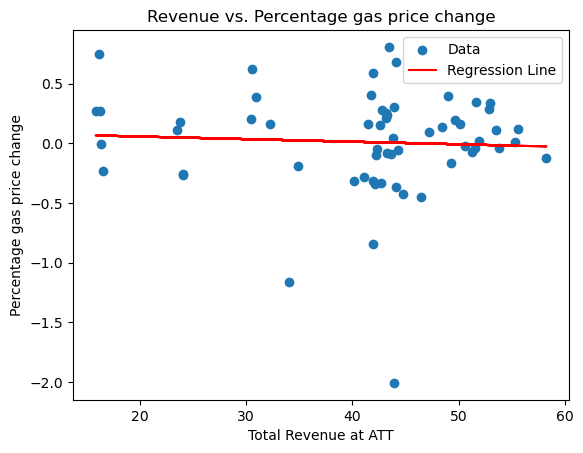

In [30]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['gas_perc_change'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['gas_perc_change'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Percentage gas price change')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Percentage gas price change')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [31]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.gas_perc_change)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.01294804112253404
p-value: 0.9217819308634027


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that ATT revenue is not influenced by percentage gas price change.
- ***we will not push this feature into our model***

# Prime bank loan rate

Does the Prime bank loan rate impact revenue at ATT?

$H_{0}$ Prime bank loan rate does not influence revenue.

$H_{a}$ Prime bank loan rate does influence revenue.

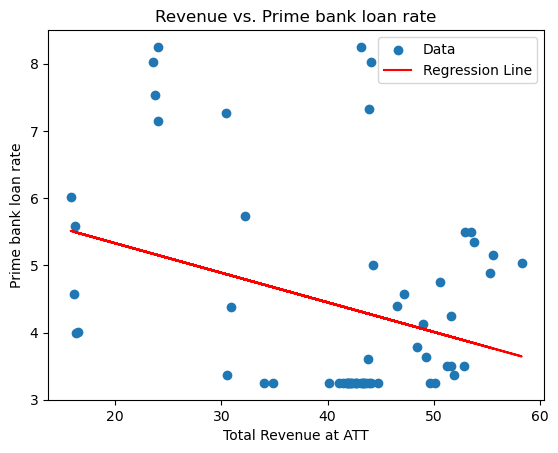

In [32]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['prime'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['prime'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Prime bank loan rate')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Prime bank loan rate')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [33]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.prime)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.0048468790456732734
p-value: 0.9706809997026236


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that ATT revenue is not influenced by the Prime bank loan rate.
- ***we will not push this feature into our model***

# Gini index

Does the Gini index impact revenue at ATT?

$H_{0}$ Gini index does not influence revenue.

$H_{a}$ Gini index does influence revenue.

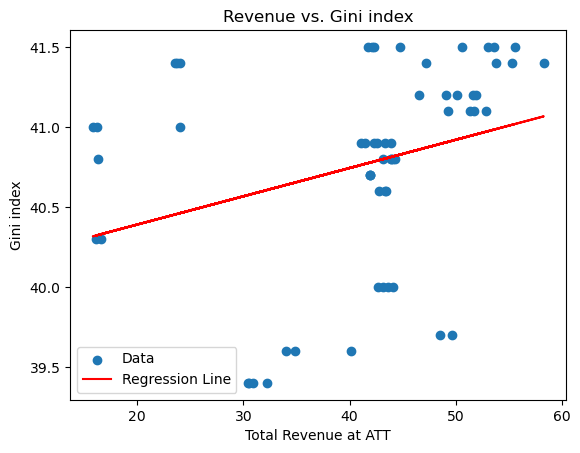

In [34]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['gini'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['gini'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Gini index')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Gini index')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [35]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.gini)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.42336654714891947
p-value: 0.0007505651613442196


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Starbucks revenue is influenced by the Gini index.
- ***we will push this feature into our model***

# Manufacturer new orders

Do Manufacturer new orders impact revenue at ATT?

$H_{0}$ Manufacturer new orders does not influence revenue.

$H_{a}$ Manufacturer new orders influence revenue.



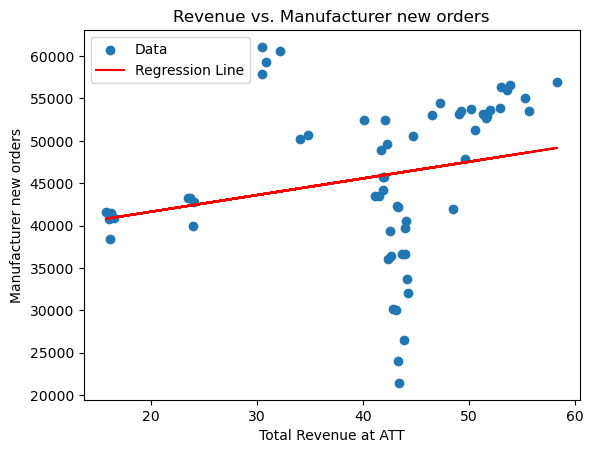

In [36]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['Man_new_order'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['Man_new_order'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Manufacturer new orders')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Manufacturer new orders')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [37]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.Man_new_order)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.32564601278132815
p-value: 0.011116933165985334


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by manufacturer new orders.
- ***we will push this feature into our model***

# Human development index

Does the Human development index impact revenue at ATT?

$H_{0}$ Human development index does not influence revenue.

$H_{a}$ Human development index does influence revenue.

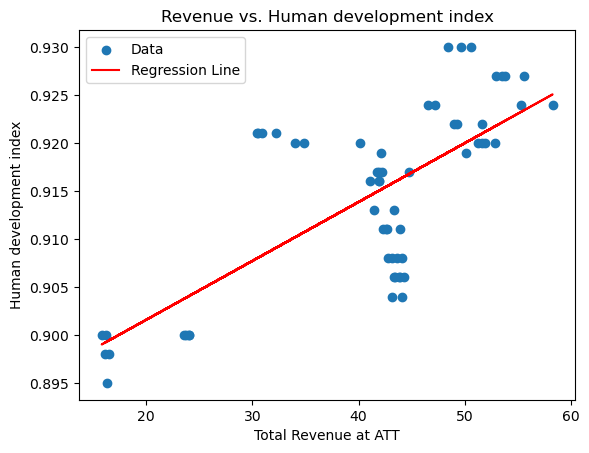

In [38]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['hdi'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['hdi'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Human development index')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Human development index')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [39]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.hdi)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.6319300475087173
p-value: 6.133573509058408e-08


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by the human development index.
- ***we will push this feature into our model***

# Residential Construction

Does residential construction impact revenue at ATT?

$H_{0}$ Residential construction does not influence revenue.

$H_{a}$ Residential construction does influence revenue.

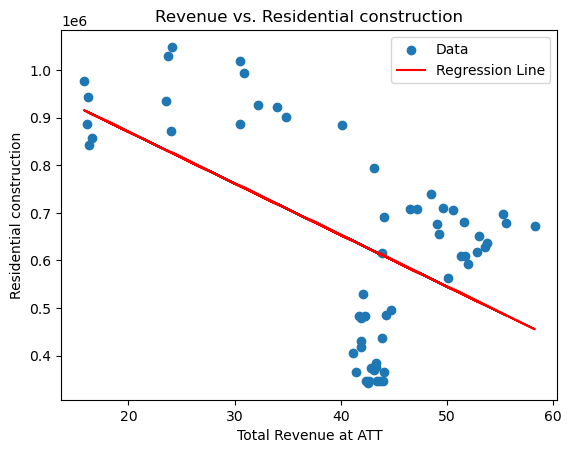

In [40]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['construction_res'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['construction_res'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Residential construction')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Residential construction')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [41]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.construction_res)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.33698249513753825
p-value: 0.008467446839946735


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is not influenced by residential constuction.
- ***we will push this feature into our model***

# Composite leading indicator

Does the composite leading indicator impact revenue at ATT?

$H_{0}$ Composite leading indicator does not influence revenue.

$H_{a}$ Composite leading indicator does influence revenue.


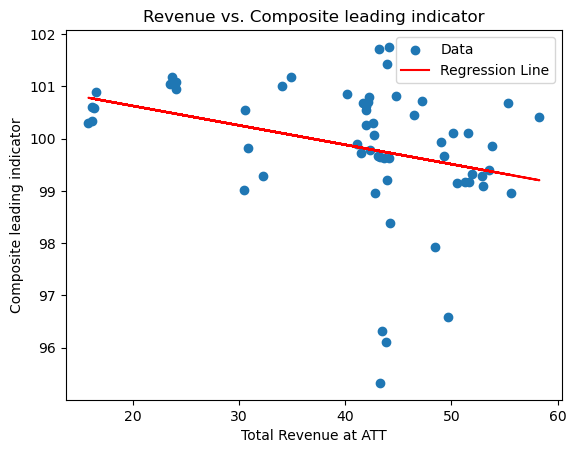

In [42]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['cli'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['cli'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Composite leading indicator')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Composite leading indicator')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [43]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.cli)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.44162267296471247
p-value: 0.00041196827281603514


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by the composite leading indicator.
- ***we will push this feature into our model***

# Auto loan rate

Do auto loan rates impact revenue at ATT?

$H_{0}$ Auto loan rates do not influence revenue.

$H_{a}$ Auto loan rates do influence revenue.

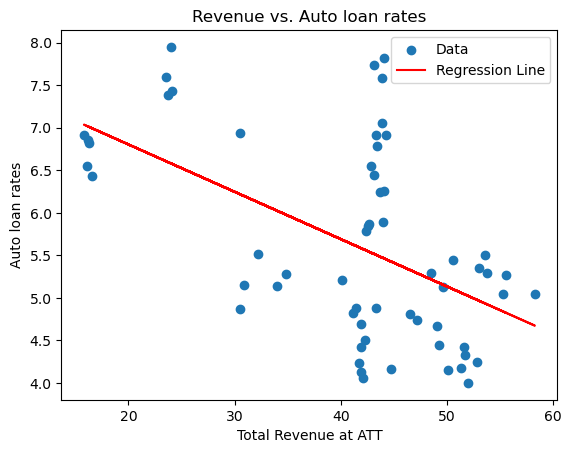

In [44]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['auto_loan'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['auto_loan'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Auto loan rates')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Auto loan rates')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [45]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.auto_loan)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.3889622239357438
p-value: 0.0021302756540325088


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by auto loan rates.
- ***we will push this feature into our model***

# Velocity of money

Does velocity of money impact revenue at ATT?

$H_{0}$ Velocity of money does not influence revenue.

$H_{a}$ Velocity of money does influence revenue.

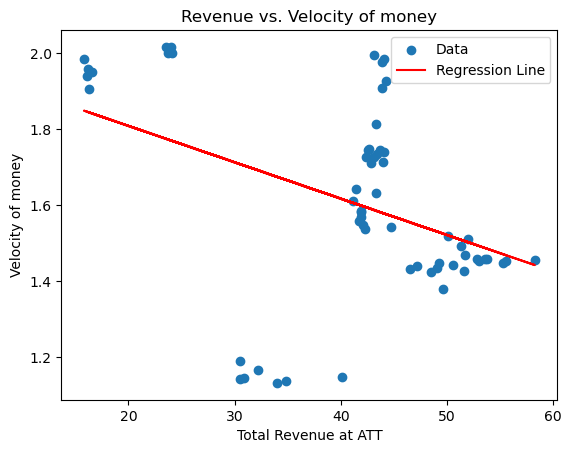

In [46]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['velocity_of_money'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['velocity_of_money'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Velocity of money')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Velocity of money')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [47]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.velocity_of_money)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.37009044588046247
p-value: 0.0036083220483256176


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by the velocity of money.
- ***we will push this feature into our model***

# Loans and leases other than vehicle and real estate

Do loans and leases other than vehicle and real estate impact revenue at ATT?

$H_{0}$ Loans and leases other than vehicle and real estate does not influence revenue.

$H_{a}$ Loans and leases other than vehicle and real estate does influence revenue.

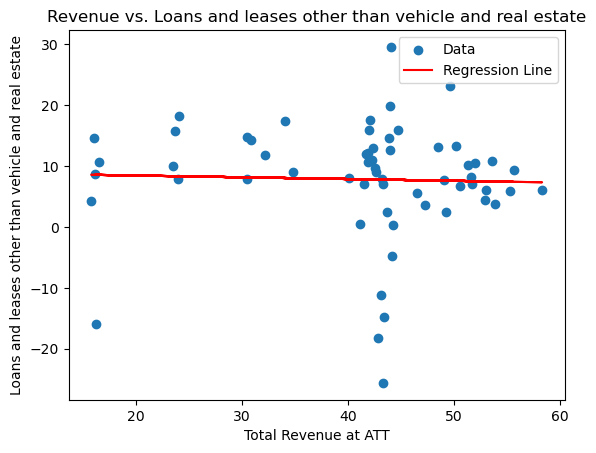

In [48]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['loans_and_leases'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['loans_and_leases'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Loans and leases other than vehicle and real estate')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Loans and leases other than vehicle and real estate')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [49]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.loans_and_leases)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.2044043075442749
p-value: 0.11720981669762445


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that ATT revenue is not influenced by loans and leases other than vehicle and real estate.
- ***we will not push this feature into our model***

# West Texas intermediate oil

Does West Texas intermediate oil impact revenue at ATT?

$H_{0}$ West Texas intermediate oil does not influence revenue.

$H_{a}$ West Texas intermediate oil does influence revenue.

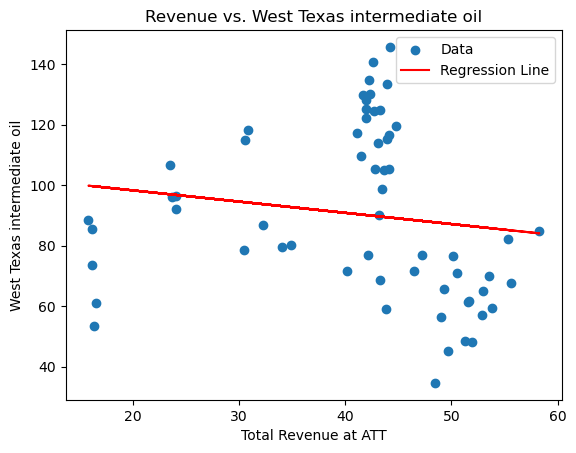

In [51]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['wti'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['wti'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. West Texas intermediate oil')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('West Texas intermediate oil')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [52]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.wti)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.37271464295637685
p-value: 0.003359497951161283


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that ATT revenue is influenced by West Texas intermediate oil.
- ***we will push this feature into our model***

# Soy bean prices

Do soy bean prices impact revenue at ATT?

$H_{0}$ Soy bean prices do not influence revenue.

$H_{a}$ Soy bean prices do influence revenue.

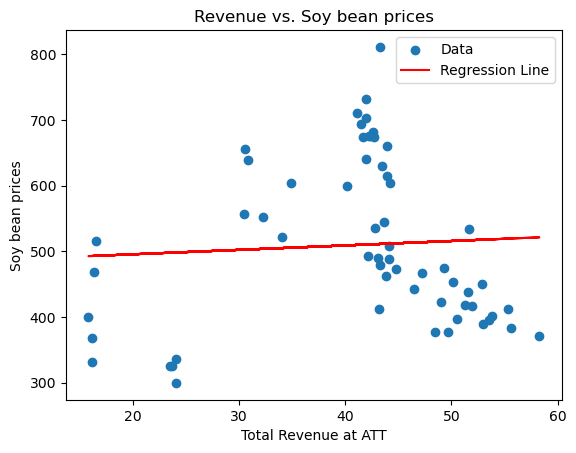

In [53]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['soy'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['soy'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Soy bean prices')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Soy bean prices')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [54]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.soy)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.21978327313142546
p-value: 0.0915415081291263


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that ATT revenue is not influenced by soy bean prices.
- ***we will not push this feature into our model***

# Misery index

Does the misery index impact revenue at ATT?

$H_{0}$ The misery index does not influence revenue.

$H_{a}$ The misery index does influence revenue.

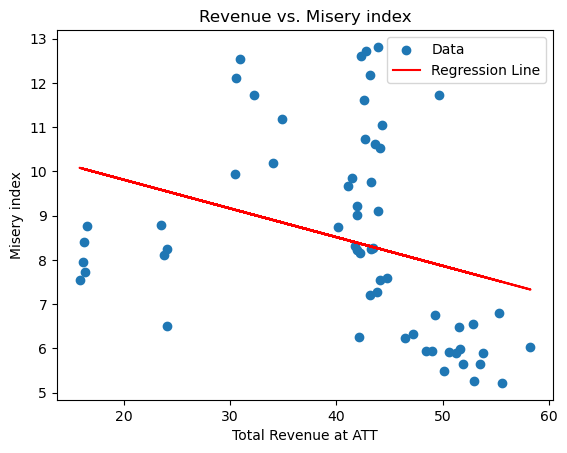

In [55]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_A'], train['misery_index'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_A'], train['misery_index'])
line = slope * train['adjusted_revenue_A'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_A'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Misery index')
plt.xlabel('Total Revenue at ATT')
plt.ylabel('Misery index')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [56]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_A, train.misery_index)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.5427618782995278
p-value: 7.458110932184496e-06


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Starbucks revenue is influenced by the misery index.
- ***we will push this feature into our model***

#### Exploration Summary
- visualized
- checked target for normalcy to determine parametric or non-parametric testing
    - target is not normally distributed, therefore spearman's rank correlation test was used for all features
- found that xxxx features tested are significant to Starbucks revenue


# Multi-variate analysis


In [ ]:
def multivariate_exploration(train, target_variable):
    '''
    Perform different combinations of visualizations to explore relationships with the target variable
    '''

    # Numeric variables for scatter plots
    numeric_vars = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Remove target variable from the list of numeric variables
    numeric_vars.remove(target_variable)

    # Plot scatter plots for numeric variables
    for var in numeric_vars:
        sns.scatterplot(x=var, y=target_variable, data=train)
        plt.xlabel(var)
        plt.ylabel(target_variable)
        plt.title(f'{var} vs. {target_variable}')
        plt.show()

    # Categorical variables for box plots
    categorical_vars = train.select_dtypes(include=['object']).columns.tolist()

    # Plot box plots for categorical variables
    for var in categorical_vars:
        sns.boxplot(x=var, y=target_variable, data=train)
        plt.xlabel(var)
        plt.ylabel(target_variable)
        plt.title(f'{var} vs. {target_variable}')
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    corr = train.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Pairplot for selected variables
    selected_vars = numeric_vars[:4]  # Select first 4 numeric variables for pairplot
    selected_vars.append(target_variable)
    sns.pairplot(df[selected_vars], diag_kind='hist', plot_kws={'alpha': 0.5})
    plt.show()

In [ ]:
multivariate_exploration(train, 'adjusted_revenue_B')

# prepare data for modeling

In [98]:
this_is_it = pd.read_csv('values_for_prediction_ford_adjusted.csv')
this_is_it

,adjusted_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,misery_index,home_ownership_rate,government_spending,...,brent_oil,case_shiller_index,number_of_disaster,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business,wars_started
0,NaN,2023,1,334.44,82222.021429,5.08,3.5,8.48692,66.0,6512.501649,...,80.115951,891.622,232,97.343637,98.946783,23906.912839,5751.208898,3373.021464,7,2


In [99]:
att_revenue_prediction = this_is_it[['population','federal_fund_rate', 'misery_index', 
                                     'home_ownership_rate', 'government_spending',
                                     'gdp_deflated', 'violent_crime_rate',
                                     'cpi_all_items_avg', 'palmer_drought_index', 'eci', 
                                     'dow', 's_and_p', 'gini', 'Man_new_order', 'hdi', 
                                     'construction_res', 'cli','auto_loan', 'velocity_of_money', 
                                     'wti', 'brent_oil', 'consumer_confidence_index', 
                                     'business_confidence_index','c_e_s_housing', 'c_e_s_health', 
                                     'c_e_s_entertainment', 'ease_of_doing_business']]
att_revenue_prediction

,population,federal_fund_rate,misery_index,home_ownership_rate,government_spending,gdp_deflated,violent_crime_rate,cpi_all_items_avg,palmer_drought_index,eci,...,auto_loan,velocity_of_money,wti,brent_oil,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business
0,334.44,5.08,8.48692,66.0,6512.501649,130.8,384.75,301.836,-1.51,159.5,...,7.46,1.222,74.143623,80.115951,97.343637,98.946783,23906.912839,5751.208898,3373.021464,7


In [100]:
def scaled_df(train, test, att_revenue_prediction):
    """
    This function scales the train, validate, and test data using the MinMaxScaler.

    Parameters:
    train (pandas DataFrame): The training data.
    test (pandas DataFrame): The test data.
    ford_revenue_prediction (pandas DataFrame): The data for Ford revenue prediction.

    Returns:
    Tuple of:
        X_train_scaled (pandas DataFrame): The scaled training data.
        X_test_scaled (pandas DataFrame): The scaled test data.
        y_train (pandas Series): The target variable for the training data.
        y_test (pandas Series): The target variable for the test data.
        X_train (pandas DataFrame): The original training data.
        ford_revenue_prediction_scaled (pandas DataFrame): The scaled Ford revenue prediction data.
    """

    X_train = train[['population','federal_fund_rate', 'misery_index', 
                                     'home_ownership_rate', 'government_spending',
                                     'gdp_deflated', 'violent_crime_rate',
                                     'cpi_all_items_avg', 'palmer_drought_index', 'eci', 
                                     'dow', 's_and_p', 'gini', 'Man_new_order', 'hdi', 
                                     'construction_res', 'cli','auto_loan', 'velocity_of_money', 
                                     'wti', 'brent_oil', 'consumer_confidence_index', 
                                     'business_confidence_index','c_e_s_housing', 'c_e_s_health', 
                                     'c_e_s_entertainment', 'ease_of_doing_business']]
    X_test = test[['population','federal_fund_rate', 'misery_index', 
                                     'home_ownership_rate', 'government_spending',
                                     'gdp_deflated', 'violent_crime_rate',
                                     'cpi_all_items_avg', 'palmer_drought_index', 'eci', 
                                     'dow', 's_and_p', 'gini', 'Man_new_order', 'hdi', 
                                     'construction_res', 'cli','auto_loan', 'velocity_of_money', 
                                     'wti', 'brent_oil', 'consumer_confidence_index', 
                                     'business_confidence_index','c_e_s_housing', 'c_e_s_health', 
                                     'c_e_s_entertainment', 'ease_of_doing_business']]

    y_train = train.adjusted_revenue_A
    y_test = test.adjusted_revenue_A

    # Making our scaler
    scaler = MinMaxScaler()
    
    # Fitting our scaler and using it to transform train and test data
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                                  columns=X_train.columns,
                                  index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                                 columns=X_test.columns,
                                 index=X_test.index)
    
    # Scaling the Ford revenue prediction data
    att_revenue_prediction_scaled = pd.DataFrame(scaler.transform(att_revenue_prediction.values.reshape(1, -1)),
                                                  columns=att_revenue_prediction.columns,
                                                  index=att_revenue_prediction.index)

    return X_train_scaled, X_test_scaled, y_train, y_test, X_train, att_revenue_prediction_scaled


In [101]:
X_train_scaled, X_test_scaled, y_train, y_test, X_train, att_revenue_prediction_scaled = scaled_df(train, test, att_revenue_prediction)
X_train_scaled.head()

,population,federal_fund_rate,misery_index,home_ownership_rate,government_spending,gdp_deflated,violent_crime_rate,cpi_all_items_avg,palmer_drought_index,eci,...,auto_loan,velocity_of_money,wti,brent_oil,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business
1,0.988978,0.478764,0.855481,0.492063,0.355758,0.973183,0.366041,1.000000,0.171322,0.971154,...,0.384810,0.037288,0.469404,0.453992,0.000000,0.613128,0.437354,0.770482,0.181139,0.833333
24,0.760798,0.007722,0.201972,0.126984,0.212918,0.501732,0.305461,0.507804,0.360335,0.514423,...,0.113924,0.357062,0.280396,0.251828,0.878186,0.661299,0.426407,0.801922,0.502852,0.833333
65,0.174409,0.998069,0.170544,0.968254,0.046969,0.158478,1.000000,0.165322,0.223464,0.116987,...,1.000000,1.000000,0.556416,0.461548,0.679123,0.635745,0.620748,0.070011,0.380170,0.166667
45,0.478914,0.000000,1.000000,0.539683,0.184087,0.330916,0.213311,0.378542,0.343575,0.304487,...,0.478481,0.657627,0.725404,0.945709,0.119737,0.642569,0.093925,0.199729,0.247400,0.500000
60,0.253686,0.803089,0.512400,0.777778,0.072768,0.216895,0.936007,0.228748,0.272812,0.184295,...,0.908861,0.954802,0.888846,0.794854,0.525920,0.527409,0.612545,0.063463,0.775930,0.166667


In [102]:
att_revenue_prediction_scaled 

,population,federal_fund_rate,misery_index,home_ownership_rate,government_spending,gdp_deflated,violent_crime_rate,cpi_all_items_avg,palmer_drought_index,eci,...,auto_loan,velocity_of_money,wti,brent_oil,consumer_confidence_index,business_confidence_index,c_e_s_housing,c_e_s_health,c_e_s_entertainment,ease_of_doing_business
0,1.007739,0.965251,0.430529,0.492063,0.397661,1.027964,0.193259,1.04469,0.350093,1.030449,...,0.875949,0.101695,0.355734,0.34244,0.18997,0.482404,0.436811,0.768071,0.149079,0.833333


In [103]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [104]:
def baseline_model(train, y_train):
    """
    Creates a baseline model using the mean of the target variable and evaluates its performance.

    Parameters:
        train (pandas DataFrame): The training data containing the feature variables.
        y_train (pandas Series): The target variable for the training data.

    Returns:
        pandas DataFrame: A DataFrame containing the evaluation metrics of the baseline model.

    The function creates a baseline model by setting the predicted value as the mean of the target variable (y_train).
    It calculates the root mean squared error (RMSE) and R^2 score of the baseline model using the y_train values
    and an array filled with the mean value. The RMSE and R^2 score are added to a DataFrame for comparison.

    Additionally, the function prints the baseline value and returns the DataFrame with the evaluation metrics.
    """
    #set baseline
    baseline = round(y_train.mean(),2)

    #make an array to send into my mean_square_error function
    baseline_array = np.repeat(baseline, len(train))

    # Evaluate the baseline rmse and r2
    rmse, r2 = metrics_reg(y_train, baseline_array)

    # add results to a dataframe for comparison
    metrics_df = pd.DataFrame(data=[
    {
        'model':'Baseline',
        'rmse':rmse,
        'r2':r2
    }
    ])
    
    # print baseline
    baseline = round(y_train.mean(),2)
    print(f' Baseline mean is : {baseline}')
    return metrics_df

In [105]:
metrics_df = baseline_model(train, y_train)
metrics_df

 Baseline mean is : 41.05


,model,rmse,r2
0,Baseline,10.911632,-1.881190e-07


In [106]:
# Define the model and the hyperparameter grid
model = LinearRegression()
param_grid = {
    'normalize': [True, False],
    'fit_intercept': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error:", mse**0.5)

Best Hyperparameters: {'fit_intercept': False, 'normalize': True}
Root Mean Squared Error: 8.917759059392468


In [124]:
def multiple_regression(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df):
    """
    Performs multiple regression using Recursive Feature Elimination (RFE) and evaluates the model's performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_test_scaled (pandas DataFrame): The scaled feature variables of the test data.
        y_train (pandas Series): The target variable for the training data.
        y_test (pandas Series): The target variable for the test data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the multiple regression model.
    """
    # Define the model
    model = LinearRegression()

    # Create the RFE object
    rfe = RFE(estimator=model, n_features_to_select=27)  

    # Fit the RFE object to the training data
    rfe.fit(X_train_scaled, y_train)

    # Get the selected features
    selected_features = X_train_scaled.columns[rfe.support_].tolist()

    # Transform the data using the selected features
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)

    # Fit the model on the transformed training data
    model.fit(X_train_rfe, y_train)

    # Make predictions on the transformed test data
    pred_test_OLS = model.predict(X_test_rfe)

    # Evaluate the model on the test data
    rmse, r2 = metrics_reg(y_test, pred_test_OLS)

    # Add evaluation metrics to the provided metrics DataFrame
    metrics_df.loc[1] = ['Multiple Regression', rmse, r2]

    return metrics_df




In [125]:
metrics_df = multiple_regression(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df)
metrics_df

,model,rmse,r2
0,Baseline,10.911632,-1.881190e-07
1,Multiple Regression,9.000260,5.492634e-01
2,LassoLars,7.944650,6.487937e-01
4,Generalized Linear Model,7.513428,6.858848e-01
3,Polynomial Regression(PR),8.051327,6.392987e-01


In [134]:
def LassoLars_model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df):
    """
    Performs LassoLars regression and evaluates the model's performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_test_scaled (pandas DataFrame): The scaled feature variables of the test data.
        y_train (pandas Series): The target variable for the training data.
        y_test (pandas Series): The target variable for the test data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the LassoLars model.
    """
    # Define the model and the hyperparameter grid
    model = LassoLars(normalize=False)
    param_grid = {
        'alpha': [0,0.1,0.25,0.5,0.75, 1],  # Example hyperparameter values to search through
        'normalize': [True, False]
    }

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test data using the best model
    pred_test_lars = best_model.predict(X_test_scaled)

    # Evaluate the model on the test data
    rmse, r2 = metrics_reg(y_test, pred_test_lars)

    # Add evaluation metrics to the provided metrics DataFrame
    metrics_df.loc[2] = ['LassoLars', rmse, r2]

    return metrics_df

In [135]:
metrics_df = LassoLars_model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df)

In [141]:
def Generalized_Linear_Model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df):
    """
    Fits a Generalized Linear Model (GLM) and evaluates its performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_test_scaled (pandas DataFrame): The scaled feature variables of the test data.
        y_train (pandas Series): The target variable for the training data.
        y_test (pandas Series): The target variable for the test data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the GLM.
    """
    # Define the model and the hyperparameter grid
    model = TweedieRegressor()
    param_grid = {
        'alpha': [0, 0.5, 1],  # Example values for alpha
        'power': [0, 1, 2]  # Example values for power
    }

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test data using the best model
    pred_test_glm = best_model.predict(X_test_scaled)

    # Evaluate the model on the test data
    rmse, r2 = metrics_reg(y_test, pred_test_glm)

    # Add evaluation metrics to the provided metrics DataFrame
    metrics_df.loc[4] = ['Generalized Linear Model', rmse, r2]

    return metrics_df, best_model

In [142]:
metrics_df, best_model = Generalized_Linear_Model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df)

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df):
    """
    Performs polynomial regression and evaluates the model's performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_test_scaled (pandas DataFrame): The scaled feature variables of the test data.
        y_train (pandas Series): The target variable for the training data.
        y_test (pandas Series): The target variable for the test data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the polynomial regression model.
    """
    # Create the pipeline
    pipeline = Pipeline([
        ('polynomialfeatures', PolynomialFeatures()),
        ('linearregression', LinearRegression())
    ])

    # Define the hyperparameter grid
    param_grid = {
        'polynomialfeatures__degree': [1, 2, 3, 4, 5]  
    }

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test data using the best model
    pred_test_pr = best_model.predict(X_test_scaled)

    # Evaluate the model on the test data
    rmse, r2 = metrics_reg(y_test, pred_test_pr)

    # Add evaluation metrics to the provided metrics DataFrame
    metrics_df.loc[3] = ['Polynomial Regression(PR)', rmse, r2]

    return metrics_df


In [144]:
polynomial_regression(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df)

,model,rmse,r2
0,Baseline,10.911632,-1.881190e-07
1,Multiple Regression,9.000260,5.492634e-01
2,LassoLars,7.944650,6.487937e-01
4,Generalized Linear Model,7.513428,6.858848e-01
3,Polynomial Regression(PR),8.051327,6.392987e-01


# Make the prediction

In [145]:
# Pass the preprocessed single line of data to the best_model
pred_value = best_model.predict(att_revenue_prediction_scaled)

# Print the predicted value
print(pred_value)


[36.00430263]


# Summary 

Last quarter (Q1 2023) Ford's revenue was 41.474B.
- The goal of this project was to predict whether or not Ford's revenue would increase or decrease in the next quarter.
    - Our team wanted to see if economic, socio-economic and evironmental factors could predict revenue gains and losses. 
- We first brainstormed many potential features.
    - We acquired data from over 40 separate data sets and combined them into one CSV for exploration.
    - We discovered many interesting relationships between our various independent variables.
- Through extensive feature selection and meticulous statistical testing, we selected 15 features to send into our regression models.
    - Key factors in making our models produce results that beat baseline RMSE and produced a respectable $R^2$ value
        - Lagging revenue back 1 period
            - Doing this trained the model to use previous quarters data to predict next quarters revenue
            - We also took the 2023 2nd quarter data minus Ford's revenue and set it aside 
                - Timing is everything... Ford will release 2023 Q2 revenue on 27 July. We will be able to compare our prediction to that number. 
        - Adjusting our monetary features for inflation. 
            - We used the Consumer Price Index to perform deflation
        - Used grid search to optimize our hyperparameters in concert with recursive feature elimination
- We compared the results of 4 models
| model                       | rmse      | r2              |
|-----------------------------|-----------|-----------------|
| Baseline                    | 9.458673  | -2.741374e-07   |
| Multiple Regression         | 5.331748  | 7.996339e-01    |
| LassoLars                   | 6.205169  | 7.286111e-01    |
| Generalized Linear Model    | 5.704175  | 7.706649e-01    |
| Polynomial Regression(PR)   | 5.331748  | 7.996339e-0     |


- Polynomial Regression performed similarly to Multiple linear Regression because the best performing hyperparameter was degree = 1. 

- Once we selected the best model. We ran our best model on the set aside Q2 features. 
    - Our prediction is 39.99B in revenue. We are not predicting the actual number but using this figure to compare to last quarter and predict a slight descrease in revenue for Q2.


# Conclusion

# Next Steps